In [14]:
# basic modules
import numpy as np
import matplotlib.pyplot as plt
import sys

# pytorch modules
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torchvision import __version__ as torchvision_version

%load_ext autoreload
%autoreload 2

print("Torch version:", torch.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Torch version: 1.13.0a0+d0d6b1f


In [15]:
# include plots in notebook
%matplotlib inline

In [16]:
from utils.mnist_preprocessing import *
from utils.mnist_plotting import *

# dataset parameters
DATASET_BATCH_SIZE = 128
DATASET_SHUFFLE = True

In [17]:
import clip

model, preprocess = clip.load("RN50")

In [18]:
transform = transforms.ToPILImage()

# type(preprocess) -> torchvision.transforms.transforms.Compose
# # change normalization factors for testing
if False:
    preprocess.transforms[4].mean = (0,0,0)
    preprocess.transforms[4].std = (1,1,1)
    preprocess

# Change normalizer
if False:
    preprocess = transforms.Compose([transforms.ToTensor(),
                                    transforms.Normalize((0,0,0), (1,1,1))])

preprocess

Compose(
    Resize(size=224, interpolation=bicubic, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    <function _convert_image_to_rgb at 0x7fcc826d5d30>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

In [19]:
# create and select training dataset
# original 10 class problem
train_set = DatasetMNIST(root='./data',
                            env='train',
                            color=True,
                            opt_postfix="10classes",
                            first_color_max_nr=4,
                            preprocess=preprocess,
                            transform= transforms.Compose([transforms.ToTensor()]))

train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                            batch_size=DATASET_BATCH_SIZE,
                                            shuffle=DATASET_SHUFFLE,
                                            num_workers=10)

print("Number of samples: ", len(train_set))

MNIST dataset already exists
Number of samples:  50000


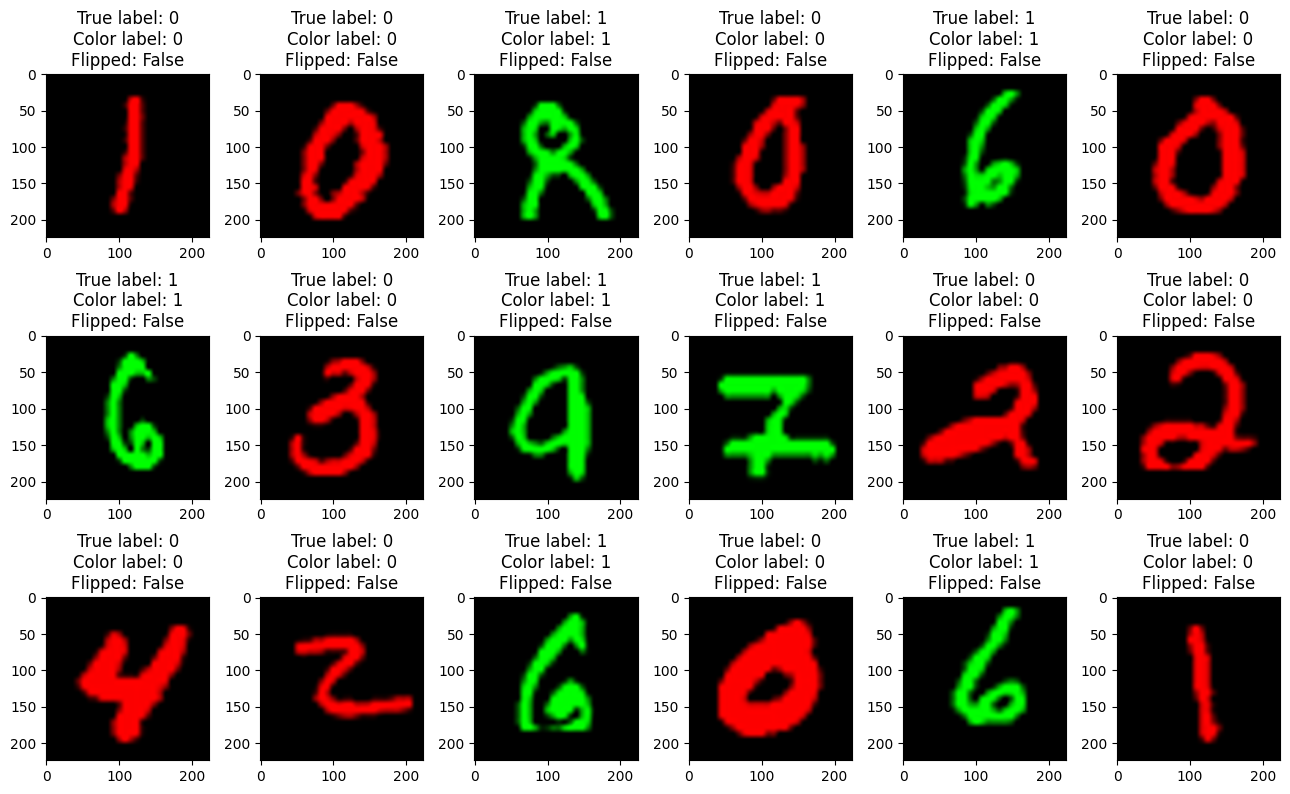

In [20]:
plot_digits(train_set, preprocess)

In [21]:
for data in train_loader:
    inputs, _, _, _ = data # list with four entries
    print(f"Shape of the input: {inputs.shape}") # torch.Size([128, 3, 28, 28])
    print(f"Minimum value of the input: {inputs.min()}")
    print(f"Maximum value of the input: {inputs.max()}") 
    
    break

Shape of the input: torch.Size([128, 3, 224, 224])
Minimum value of the input: -1.7922625541687012
Maximum value of the input: 2.0748836994171143
